<a href="https://colab.research.google.com/github/Pradeep24032004/data_science/blob/main/Medical_Insurance_Cost_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [ ]:
#loading the data from csv to a pandas dataframe
#importing the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/datascience
%pwd
%ls

/content/drive/My Drive/datascience
 data.csv        mail_data.csv  'Sample - Superstore.xls'   titanic.csv
 insurance.csv   nba.csv         spam_ham_dataset.csv       USA_cars_datasets.csv


In [ ]:
insurance_dataset = pd.read_csv('insurance.csv')

In [ ]:
#first 5 rows of the dataset
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#finding no of rows and columns
insurance_dataset.shape

(1338, 7)

In [ ]:
#Information about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
#checking the missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
#statstical measures of dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<ipython-input-10-6eb11712bbe8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


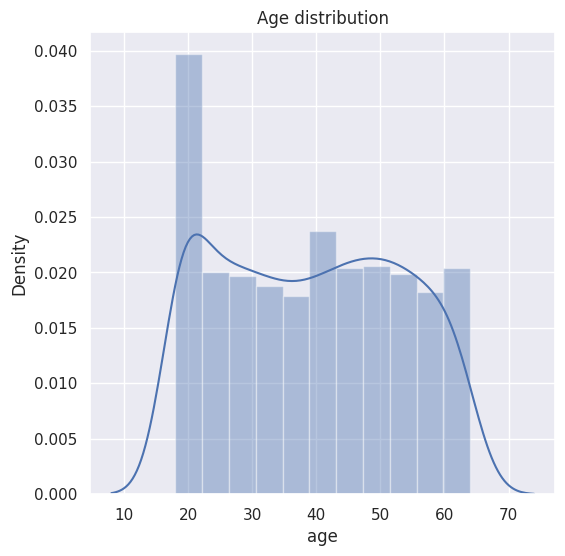

In [ ]:
#distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title("Age distribution")
plt.show()

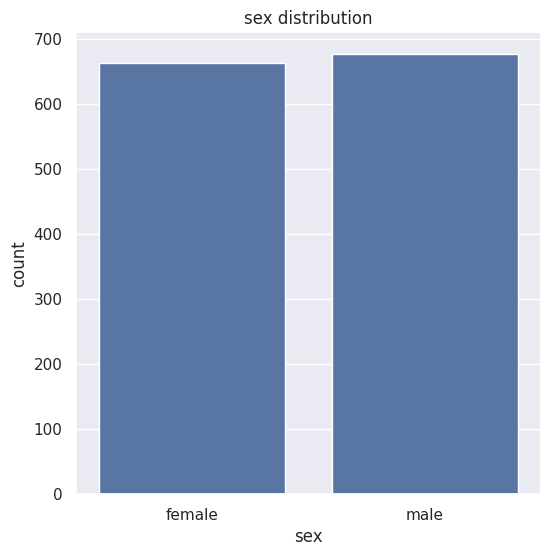

In [ ]:
#gender column
plt.figure(figsize = (6,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('sex distribution')
plt.show()

In [ ]:
insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

<ipython-input-13-d4737db0d64d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'])


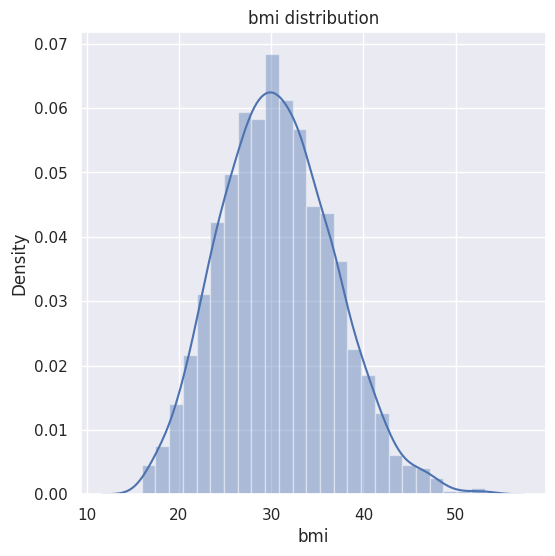

In [ ]:
#bmi distribution
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title("bmi distribution")
plt.show()

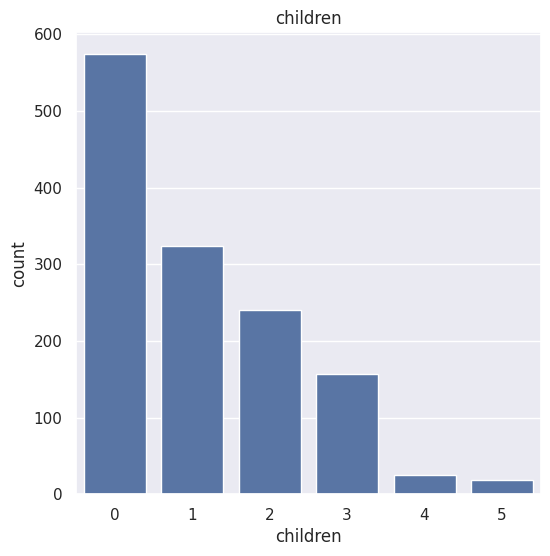

In [ ]:
#normal bmi range should be 18 to 24.5
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_dataset)
plt.title('children')
plt.show()

In [ ]:
insurance_dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

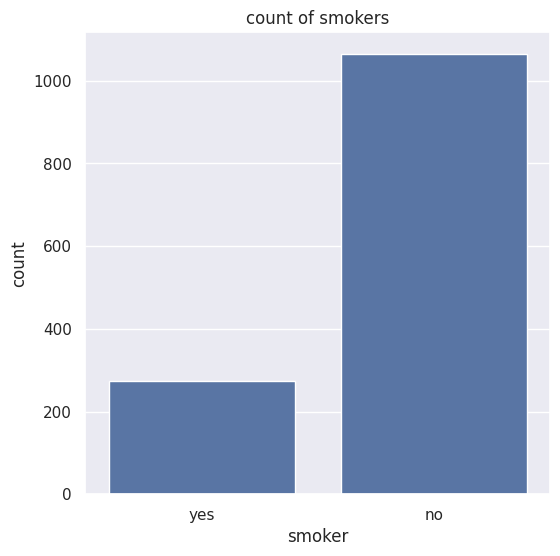

In [ ]:
#distribution for smoker
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('count of smokers')
plt.show()

In [ ]:
insurance_dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

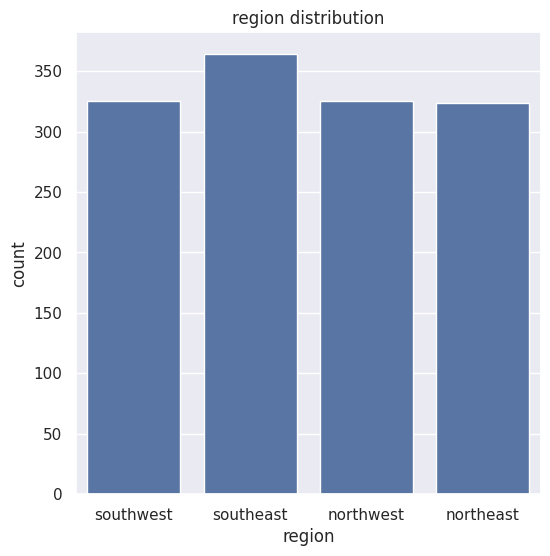

In [ ]:
#region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data = insurance_dataset)
plt.title('region distribution')
plt.show()

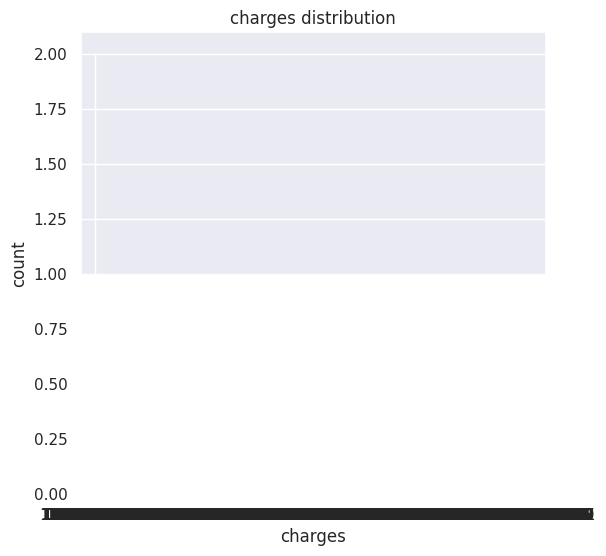

In [ ]:
#charges column
plt.figure(figsize=(6,6))
sns.countplot(x='charges', data=insurance_dataset)
plt.title('charges distribution')
plt.show()

In [ ]:
#encoding the categorical features converting category texts(yes or no) into numericals
insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace = True)
#encoding scalar column
insurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace = True)
#encoding Region column
insurance_dataset.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace = True)

In [ ]:
#splitting features and target
#age, sex, bmi, children, smoker and region as features and charges as target
X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']

In [ ]:
#splittting the data into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 2)


In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [ ]:
#calling linear regression model
regressor = LinearRegression()


In [ ]:
#fitting data into the linear regression
regressor.fit(X_train, Y_train)

LinearRegression()

In [ ]:
#model evaluation
#prediction on training data
training_data_prediction = regressor.predict(X_train)

In [ ]:
#R Square value on training data
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print("R Squared value of training data:", r2_train)

R Squared value of training data: 0.751505643411174


In [ ]:
#R squared value on testing data
testing_data_prediction = regressor.predict(X_test)
r2_test = metrics.r2_score(Y_test, testing_data_prediction)
print("R Squared value of testing data:", r2_test)

R Squared value of testing data: 0.7447273869684076


In [ ]:
#building a predictive system
input_data = (60,1,36.005,0,1,2)
#changing input data into numpy array
input_data_as_numpy_array = np.asarray(input_data)
#reshaping the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)


In [ ]:
#predicting the cost
prediction = regressor.predict(input_data_reshaped)
print('The cost of your model insurance', prediction)

The cost of your model insurance [14869.35897203]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
